# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [60]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/train.p"
validation_file= "C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/valid.p"
testing_file = "C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [61]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Some training samples



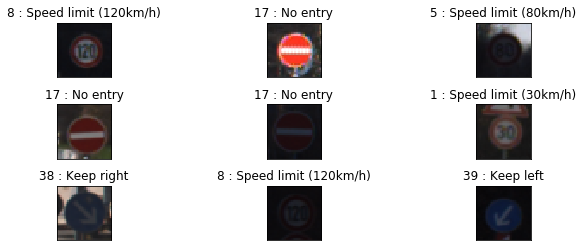

Some testing samples



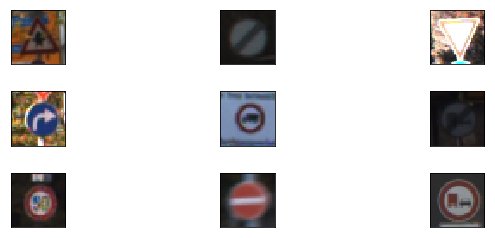

In [62]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_labels = np.genfromtxt('signnames.csv', delimiter=',',skip_header=1, usecols=(1,), unpack=True, dtype=None)

def plot_images(images, rows, columns, labels=[], labels_dict={}, random=True):
    figure = plt.figure()
    figure.subplots_adjust(right=1.5, hspace=0.5)
    n_images = len(images)
    max_plots = rows * columns
    end_range = n_images + 1 if n_images < max_plots else max_plots + 1
    for i in range(1,end_range):
        idx = np.random.choice(n_images, size=1, replace=False)[0] if random == True else i-1
        image = images[idx]
        subplot = figure.add_subplot(rows,columns,i)
        if len(labels) == n_images:
            id = labels[idx]      
            label = "{0} : {1}".format(id, labels_dict[id].decode())
        else:
            label = ""
        subplot.set_title(label)
        plt.xticks(np.array([])) 
        plt.yticks(np.array([])) 
        plt.imshow(image)
    plt.show()
    
print("Some training samples")
print()
plot_images(X_train, 3, 3, y_train, sign_labels)
print("Some testing samples")
print()
plot_images(X_test, 3, 3, y_train, sign_labels)



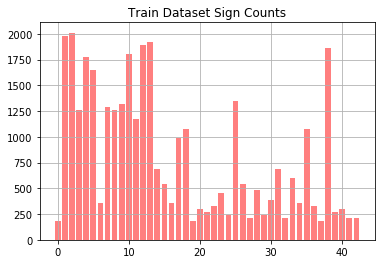

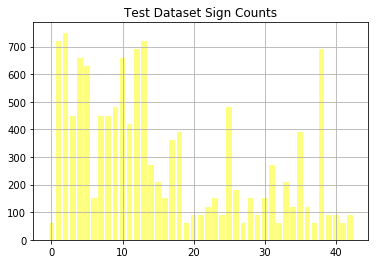

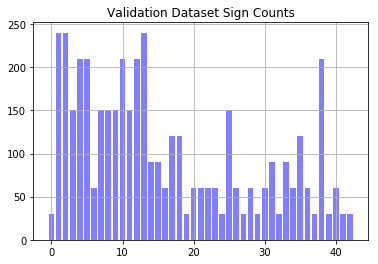

In [63]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts,facecolor='red', alpha=0.5)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts,facecolor='yellow', alpha=0.5)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique, counts = np.unique(y_validation, return_counts=True)
plt.bar(unique, counts,facecolor='blue', alpha=0.5)
plt.grid()
plt.title("Validation Dataset Sign Counts")
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Example of an image from the training set converted to gray


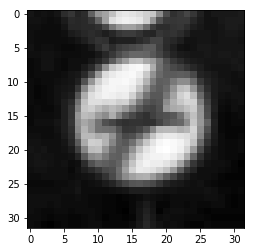

In [64]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def conv_to_gray(img_array):
    new_gray_array = []
    for i in range(len(img_array)):
        new_gray_array.append(cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY))
    new_gray_array = np.array(new_gray_array).reshape((-1,32,32,1)) 
    return new_gray_array

sign_labels = np.genfromtxt('signnames.csv', delimiter=',',skip_header=1, usecols=(1,), unpack=True, dtype=None)
    
print("Example of an image from the training set converted to gray")
img = X_train[3]
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, plt.gray())

X_train_gray = conv_to_gray(X_train)
X_validation_gray = conv_to_gray(X_validation)
X_test_gray = conv_to_gray(X_test)




#normalization
#for some reason it works beter without it
#X_train = (X_train - 128)/ 128
#X_test = (X_test - 128)/128
#X_validation = (X_validation - 128) / 128
#X_train = X_train_gray / 127.5 - 1
#X_test = X_test_gray / 127.5 - 1
#X_validation = X_validation_gray / 127.5 - 1
X_train = X_train_gray
X_validation = X_validation_gray
X_test = X_test_gray

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#testing to see if shuffle is corrcetly imported
X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

import tensorflow as tf

# LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.softmax(conv1) # softmax
    conv1 = tf.nn.relu(conv1) 

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    
    
    two_conv = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    two_conv = tf.nn.bias_add(two_conv, conv2_b)

    layer_two = tf.nn.relu(two_conv)#conv2d(conv1, conv2_W, conv2_b, 1)

    layer_two = tf.nn.max_pool(layer_two, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    W_two_a = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
    b_two_a = tf.Variable(tf.zeros(412))
    
    two_conv_a = tf.nn.conv2d(layer_two, W_two_a, strides=[1, 1, 1, 1], padding='VALID')
    two_conv_a = tf.nn.bias_add(two_conv_a,b_two_a)
    
    layer_two_a = tf.nn.relu(two_conv_a)#conv2d(layer_two, W_two_a, b_two_a, 1)
    
    fc0 = flatten(layer_two_a)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(412, 122), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(122))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(122, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 100
BATCH_SIZE = 100

# features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# training pipeline
rate = 0.0009

logits11 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits11)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
# model evaluation
correct_prediction = tf.equal(tf.argmax(logits11, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

saver = tf.train.Saver()
tf.add_to_collection('x', x)
tf.add_to_collection('y', y) 
tf.add_to_collection('logits', logits11)
tf.add_to_collection('correct_prediction', correct_prediction)
tf.add_to_collection('accuracy_operation', accuracy_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# measure optimization time
import time

# train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    start = time.time()

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        c = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y}) 
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ".format(i+1), "cost: ", "{:.9f}".format(c), " accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    
    end = time.time()
    hours, rem = divmod(end - start, 3600)
    minutes, seconds = divmod(rem, 60)

    # measure training time
    print("\n")
    print("Optimization finished in:")
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
    print("\n")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # save the resulting model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22')
    print("Model saved")


Training...

EPOCH 1  cost:  0.224399820  accuracy = 0.883

EPOCH 2  cost:  0.085112207  accuracy = 0.908

EPOCH 3  cost:  0.078422137  accuracy = 0.911

EPOCH 4  cost:  0.109146796  accuracy = 0.917

EPOCH 5  cost:  0.021657525  accuracy = 0.932

EPOCH 6  cost:  0.053666685  accuracy = 0.933

EPOCH 7  cost:  0.041698691  accuracy = 0.926

EPOCH 8  cost:  0.010616275  accuracy = 0.941

EPOCH 9  cost:  0.057056628  accuracy = 0.924

EPOCH 10  cost:  0.031497441  accuracy = 0.933

EPOCH 11  cost:  0.014733835  accuracy = 0.932

EPOCH 12  cost:  0.010866684  accuracy = 0.947

EPOCH 13  cost:  0.053649176  accuracy = 0.931

EPOCH 14  cost:  0.020042213  accuracy = 0.909

EPOCH 15  cost:  0.007335848  accuracy = 0.943

EPOCH 16  cost:  0.011029598  accuracy = 0.952

EPOCH 17  cost:  0.035963394  accuracy = 0.942

EPOCH 18  cost:  0.009008442  accuracy = 0.932

EPOCH 19  cost:  0.025968138  accuracy = 0.958

EPOCH 20  cost:  0.009464730  accuracy = 0.957

EPOCH 21  cost:  0.019163596  accura

In [10]:
# evaluate the model
with tf.Session() as sess: 
    saver.restore(sess, 'C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22')
   
    train_accuracy = evaluate(X_train,y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Train Accuracy = 1.000
Validation Accuracy = 0.960
Test Accuracy = 0.946


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import cv2
import os

# load the new data 
def read_label_names(filename):
    di = {}
    with open(filename) as f:
        csv_reader = csv.reader(f)
        pairs = [(int(c[0]),c[1]) for c in csv_reader if c[0]!='ClassId']
        di = dict(pairs)
    return di

def load_and_scale_images(folder): 
    image_names = os.listdir(folder) 
    bgr_images = [cv2.imread(folder + "/" + name) for name in image_names]
    rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]
   
    resized_images = [cv2.resize(img, (32, 32)) for img in rgb_images] 
    return resized_images

def grayscale(image):
  converted = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return np.expand_dims(converted, axis=4)

def process_images(images): 
  processed = [grayscale(image) for image in images] 
  return np.asarray(processed)

def plot_new_images_and_labels(images, labels):
    plt.figure(figsize=(15, 15))
    i = 1
    for image in images:
        plt.subplot(8, 8, i)
        plt.axis('off') 
        label_text = labels[i - 1]
        if label_text != -1:
            plt.title("{0:.30}".format(label_names_dict[labels[i - 1]]))
        else:
            plt.title("Not in training set")
        plt.imshow(image)
        i += 1

    plt.show()
    return

Loaded: 8 images and 8 labels.



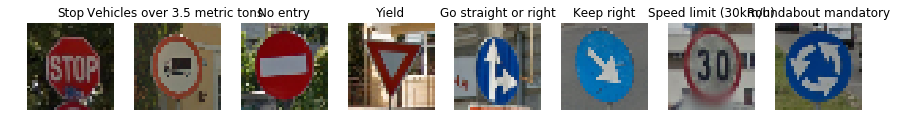

Gray images



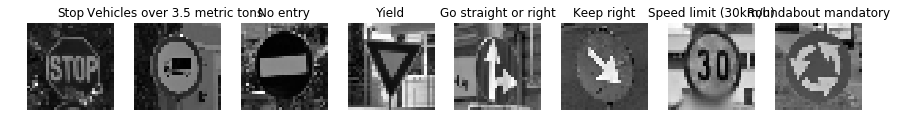

In [12]:
label_names_dict = read_label_names('signnames.csv')
images = load_and_scale_images("C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/otherImages")

images_labels = np.array([ 14, 16, 17, 
                           13, 36, 38, 
                            1, 40])

n_images = process_images(images)

print("Loaded: {0} images and {1} labels.".format(len(images), len(images_labels)))
print()
plot_new_images_and_labels(images, images_labels)

print("Gray images")
print()

i = 1
plt.figure(figsize=(15, 15))
for image in images:
    plt.subplot(8, 8, i)
    plt.axis('off') 
    plt.title("{0:.30}".format(label_names_dict[images_labels[i - 1]]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    converted = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(converted, plt.gray())
    i += 1




### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
### Run the predictions here.
import tensorflow as tf

# test with "newdata" that was loaded
tf.reset_default_graph()

with tf.Session() as sess:
    # Restore model
    saver = tf.train.import_meta_graph("lenet22" + '.meta') 
    saver.restore(sess, 'C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22')
    print("Restored: model")

    # Restore placeholders
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    print("Restored: placeholders")

    # Restore operations
    logits = tf.get_collection('logits')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    print("Restored: operations")

    all_variables = tf.trainable_variables()
    print("Restored: {0} variables".format(len(all_variables)))

    predictions = sess.run(logits, feed_dict={x: n_images})
    labels = np.argmax(predictions, axis=1)
   
 

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Restored: model
Restored: placeholders
Restored: operations
Restored: 12 variables


In [14]:
for i in range(8):
    single_item_array = []
    single_item_lable_array = []
    single_item_array.append(n_images[i])
    single_item_lable_array.append(images_labels[i])
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, 'C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22')
        acc = evaluate(single_item_array, single_item_lable_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(acc))
        print()

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 2
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 3
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 4
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 5
Image Accuracy = 0.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 6
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
Image 7
Image Accuracy = 1.000

INFO:tensorfl

### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess: 
    saver.restore(sess, 'C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22')
   
    train_accuracy = evaluate(n_images,images_labels)
    print("New Images Accuracy = {:.3f}".format(train_accuracy))

INFO:tensorflow:Restoring parameters from C:/Users/Dan/Desktop/CarND-Traffic-Sign-Classifier-Project/lenet22
New Images Accuracy = 0.750


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

probabilities = tf.placeholder(tf.float32, (None, 43))

with tf.Session() as sess:
    top_k_pro = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5), feed_dict={probabilities: predictions}) 

top_k_probabilities = top_k_pro[0]
top_k_predictions = top_k_pro[1]

print()
print("Top K probabilities: ")
print(top_k_probabilities[:5])
print()
print("Top K predictions: ")
print(top_k_predictions[:5])



Top K probabilities: 
[[  1.00000000e+00   7.46371853e-11   1.10872161e-13   2.16970657e-14
    1.59232504e-14]
 [  9.98462796e-01   4.83150914e-04   4.28159838e-04   3.74309631e-04
    1.13315364e-04]
 [  5.02614617e-01   4.97360528e-01   1.54083755e-05   7.29284648e-06
    9.57593556e-07]
 [  1.00000000e+00   1.08570151e-14   1.77406948e-16   9.09912703e-17
    1.08602296e-17]
 [  9.99856114e-01   9.27794972e-05   2.35131374e-05   1.22103265e-05
    1.00437592e-05]]

Top K predictions: 
[[14  1  6  2 38]
 [16 32  7  9  2]
 [17 33 12  9 14]
 [13 12 15  5  9]
 [24 28 18 20 36]]


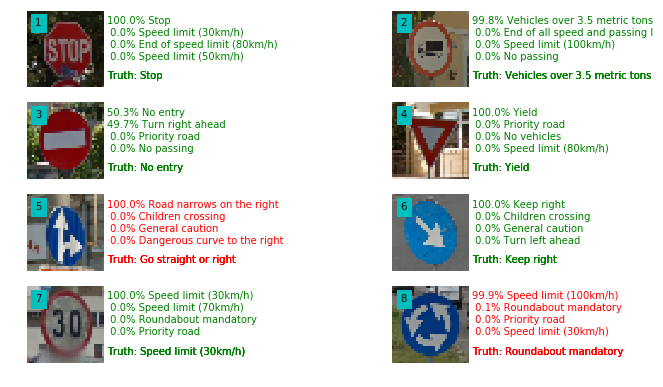

In [65]:
fig = plt.figure(figsize=(12, 20))
for i in range(len(predictions)):
    truth = images_labels[i]
    prediction = labels[i]
    plt.subplot(12, 2, 1+i)
    #plt.title("image #{0}".format(i+1))
    plt.text(3,6,str(i+1), color='k',backgroundcolor='c')
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
 
    for j in range(4):
        pred_label = label_names_dict[top_k_predictions[i][j]]
        pred_certainty = top_k_probabilities[i][j]
        plt.text(33, 5*(j+1), "{0:4.1f}% {1:.30}".format(100*pred_certainty, pred_label), color=color)
 
        plt.text(33, 28, "Truth: {0:.30}".format(label_names_dict[truth]), color=color)
    plt.imshow(images[i])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.